In [10]:
from AI_Models.LLM_Critic.Model import LLM_Simulator
from Generate_Dataset import Generate_Dataset
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.nn import MSELoss
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
DATASET_SIZE = 10000
INPUT_LOWER_LIMIT = 1
INPUT_UPPER_LIMIT = 100
OUTPUT_LOWER_LIMIT = 1
OUTPUT_UPPER_LIMIT = 10000

NUM_EPOCHS = 100

cuda


In [12]:
X, Y = Generate_Dataset(DATASET_SIZE, INPUT_LOWER_LIMIT, INPUT_UPPER_LIMIT, OUTPUT_LOWER_LIMIT, OUTPUT_UPPER_LIMIT).getX_Y()
X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)
dataset = TensorDataset(X_tensor, Y_tensor)

# Split the dataset into training and testing sets
train_size = int(DATASET_SIZE*1)
test_size = int(DATASET_SIZE*0)
trainSet, testSet = random_split(dataset, [train_size, test_size])

# Create DataLoaders for training and testing sets
train_loader = DataLoader(trainSet, batch_size=32, shuffle=True)
test_loader = DataLoader(testSet, batch_size=32, shuffle=False)

model = LLM_Simulator(1, 64, 1, 1, 10000).to(device)
loss_fn = MSELoss().to(device=device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [13]:
X.shape, Y.shape

((10000,), (10000,))

In [14]:
avg_loss_data = []

for i in range(NUM_EPOCHS):
    model.train()
    cum_loss = 0
    for X_batch, Y_batch in train_loader:
        X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
        X_batch = X_batch.view(-1, 1)  # Ensure X_batch has the correct shape
        Y_batch = Y_batch.view(-1, 1)  # Ensure Y_batch has the correct shape
        optimizer.zero_grad()
        Y_pred = model(X_batch)
        loss = loss_fn(Y_pred, Y_batch)
        cum_loss += loss.item()
        loss.backward()
        optimizer.step()
    print(f'Epoch {i+1}/{NUM_EPOCHS}, Loss: {cum_loss/len(train_loader)}')
    avg_loss_data.append(cum_loss/len(train_loader))

Epoch 1/100, Loss: 8478666.504792333
Epoch 2/100, Loss: 8418060.490415335
Epoch 3/100, Loss: 8337841.549520766
Epoch 4/100, Loss: 8454336.201277955
Epoch 5/100, Loss: 8456732.977635782
Epoch 6/100, Loss: 8416101.62140575
Epoch 7/100, Loss: 8440851.059105432
Epoch 8/100, Loss: 8448502.16453674
Epoch 9/100, Loss: 8424775.666134186
Epoch 10/100, Loss: 8429618.24600639
Epoch 11/100, Loss: 8444491.36741214
Epoch 12/100, Loss: 8452472.126198083
Epoch 13/100, Loss: 8430250.985623004
Epoch 14/100, Loss: 8436436.217252396
Epoch 15/100, Loss: 8425452.233226838
Epoch 16/100, Loss: 8439017.301916933
Epoch 17/100, Loss: 8450491.856230032
Epoch 18/100, Loss: 8440415.174121406
Epoch 19/100, Loss: 8450989.450479234
Epoch 20/100, Loss: 8437671.087859426
Epoch 21/100, Loss: 8453759.74600639
Epoch 22/100, Loss: 8439971.790734824
Epoch 23/100, Loss: 8454567.059105432
Epoch 24/100, Loss: 8432773.250798723
Epoch 25/100, Loss: 8448139.458466453
Epoch 26/100, Loss: 8438889.654952077
Epoch 27/100, Loss: 843152

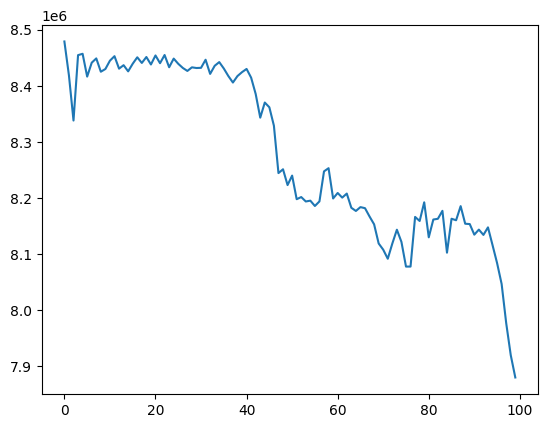

In [15]:
plt.plot(avg_loss_data)

In [16]:
model.eval()
with torch.no_grad():
    for X_batch, Y_batch in test_loader:
        X_batch, Y_batch = X_batch.to(device), Y_batch.to(device)
        X_batch = X_batch.view(-1, 1)  
        Y_batch = Y_batch.view(-1, 1)
        Y_pred = model(X_batch)
        loss = loss_fn(Y_pred, Y_batch)
        print(f'Test Loss: {loss.item()}')
        print(f'Predicted: {Y_pred[0]}')
        print(f'Actual: {Y_batch[0]}')

In [17]:
testInput = torch.tensor([[1]], dtype=torch.float32).to(device)
model.eval()
model(testInput)

tensor([[1155.5653]], device='cuda:0', grad_fn=<AddBackward0>)

In [18]:
torch.save(model.state_dict(), 'model.pth')